# Install dependencies

In [1]:
!pip install -r ../requirements.txt

In [2]:
import numpy as np

# The model
## Gather function in a class

In [3]:
class LogisticRegressionNAG:
    def __init__(self, learning_rate=0.01, momentum=0.9, n_iters=1000):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.velocity_w = None
        self.velocity_b = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        self.velocity_w = np.zeros(n_features)
        self.velocity_b = 0

        for _ in range(self.n_iters):
            lookahead_weights = self.weights + self.momentum * self.velocity_w
            lookahead_bias = self.bias + self.momentum * self.velocity_b

            linear_model = np.dot(X, lookahead_weights) + lookahead_bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.velocity_w = self.momentum * self.velocity_w - self.learning_rate * dw
            self.velocity_b = self.momentum * self.velocity_b - self.learning_rate * db

            self.weights += self.velocity_w
            self.bias += self.velocity_b

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        y_predicted = [1 if i >= 0.5 else 0 for i in y_pred_proba]
        return np.array(y_predicted)


# Test the model

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 1000
X = np.random.randn(n_samples, 2)

boundary = 0.5 * X[:, 0] + 0.1

y = (X[:, 1] > boundary + 0.1 * np.random.randn(n_samples)).astype(int)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Train the model and evaluate

In [7]:
model = LogisticRegressionNAG(learning_rate=0.05, momentum=0.9, n_iters=1000)
model.fit(X_train, y_train)


In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9650
Precision: 0.9647
Recall: 0.9535
F1 Score: 0.9591
Confusion Matrix:
[[111   3]
 [  4  82]]


# Plot the decision boundary

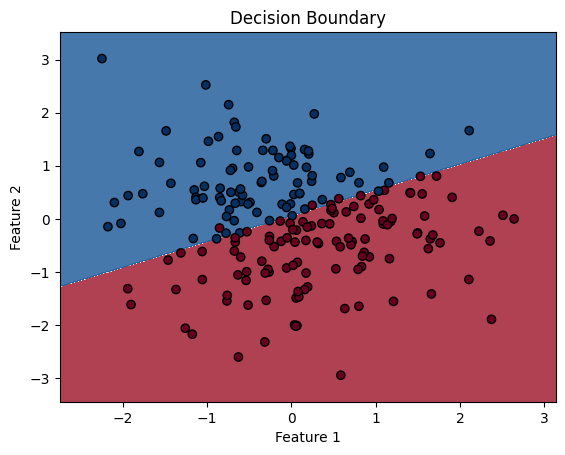

In [10]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)
